# Binary Digit Classifier

We have been offered a job at ML Solutions Limited to create a neural network classifier that can classify images of written binary digits (1 or 0).

In [ ]:
!pip install tensorflow keras numpy mnist matplotlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy
import pandas as pd # data processing
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.datasets import mnist


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


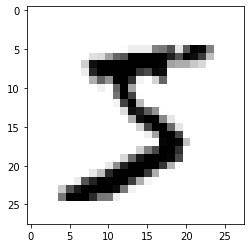

((60000, 28, 28), (10000, 28, 28))

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap= plt.cm.binary)
plt.show()
x_train.shape, x_test.shape

Now we want to take out the 1's and 0's from this dataset so that we can do classification on those. Here we are extracting the input data and their respective labels for those whose labeles have either 0 or 1.

In [ ]:
x_train, y_train = x_train[(y_train==1) | (y_train==0)],y_train[(y_train==1) | (y_train==0)]

In [ ]:
x_train.shape, y_train.shape

((12665, 28, 28), (12665,))

We do the same on the test data

In [ ]:
x_test,y_test = x_test[(y_test==1) | (y_test==0)], y_test[(y_test==1) | (y_test==0)]


In [ ]:
x_test.shape, y_test.shape

((2115, 28, 28), (2115,))

Let us see what our data looks like. We will pick a random instance from the dataset and visualize it.

Label:  1


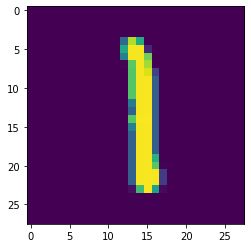

In [ ]:
import random
import matplotlib.pyplot as plt
picked_idx = random.randint(0, x_train.shape[0]-1)

img_picked = x_train[picked_idx]
label = y_train[picked_idx]

plt.imshow(img_picked)
print('Label: ', label)


# Preprocessing

Before we are ready to train our predict whether an image is a 1 or a 0, we need to do some preprocessing on the data.

In [ ]:
# Neural networks play better with small numbers. Images tend to have pixel values between 0 and 255. 
# Rescale this to 0-1. Hint try dividing
# Do this to x_train and x_test
# Remember to store the output back into x_train and x_test
x_train=(x_train/255)-0.5
x_test=(x_test/255)-0.5

In [ ]:
x_train.shape,x_test.shape

((12665, 28, 28), (2115, 28, 28))

In [ ]:
# Since you will be using a regular Dense neural network. The network expects your data to be flattened from 2D to 1D
# Rehsape the data from (N, 28, 28) to (N, 784) N represents number of images. 
# Each image is 28x28, we want to chage that to one flat row with 784
x_train =x_train.reshape((-1,784))
x_test =x_test.reshape((-1,784))


In [ ]:
x_train.shape,x_test.shape

((12665, 784), (2115, 784))

# Create Model

Create a neural network model using tensorflow with at least 1 hidden layer. The output layer must have 1 unit. Experiment with different number of layers and number of units in each layer. This is where your creativitiy as a machine learning engineer comes in to play.

In [59]:
#create model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
#model = Sequential()
#model.add(Dense(512, input_dim = 8, activation = 'relu')) 
#model.add(Dense(8, activation = 'relu'))
#model.add(Dense(1, activation = 'sigmoid'))

Compile the model

In [60]:
# Complie the model
# Ensure you use the binary cross entropy loss function and sgd for your optmizer
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])


Now to train the model. Store the ouput of model.fit in a vairable called history as we are going to use this to plot the train accuracy and loss. Try different values for batch size and epochs. The aim is to get the highest test accuaracy possible.

In [61]:
history = model.fit(x_train, y_train,epochs=150,batch_size = 5)


Epoch 1/150
2533/2533 [==============================] - 5s 2ms/step - loss: 0.1361 - accuracy: 0.9908
Epoch 2/150
2533/2533 [==============================] - 5s 2ms/step - loss: 0.0349 - accuracy: 0.9983
Epoch 3/150
2533/2533 [==============================] - 5s 2ms/step - loss: 0.0208 - accuracy: 0.9988
Epoch 4/150
2533/2533 [==============================] - 5s 2ms/step - loss: 0.0150 - accuracy: 0.9991
Epoch 5/150
2533/2533 [==============================] - 5s 2ms/step - loss: 0.0118 - accuracy: 0.9993
Epoch 6/150
2533/2533 [==============================] - 5s 2ms/step - loss: 0.0096 - accuracy: 0.9992
Epoch 7/150
2533/2533 [==============================] - 5s 2ms/step - loss: 0.0081 - accuracy: 0.9993
Epoch 8/150
2533/2533 [==============================] - 5s 2ms/step - loss: 0.0072 - accuracy: 0.9995
Epoch 9/150
2533/2533 [==============================] - 5s 2ms/step - loss: 0.0062 - accuracy: 0.9997
Epoch 10/150
2533/2533 [==============================] - 5s 2ms/step - l

# Evalualtion

Let's look at the plot of loss and accuracy. You should see accuracy going up and loss going down.

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])

Let us evaluate our model. Remember in machine learning what we are most interested in is the accuracy on the test dataset as this data represents data that the model has not seen during training so it should test the model's ability to generalize to new data.

In [ ]:
#evalute the funtion
output = model.evaluate(X_test, Y_test)
print('Accuracy {:.2f}%'.format(out[1]*100))

(784,)
Label:  0
Predicited Label 0


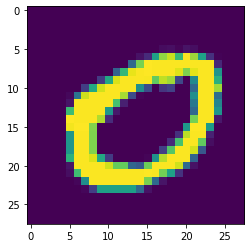

In [ ]:
picked_idx = random.randint(0, x_test.shape[0]-1)

img_picked = x_test[picked_idx]
label = y_test[picked_idx]
print(img_picked.shape)
pred_label = model.predict(img_picked.reshape(1, -1))

plt.imshow(img_picked.reshape(28, 28))
print('Label: ', label)
print('Predicited Label', 1 if pred_label > 0.5 else 0)

# Logistic Regression Using SGD (BONUS)

$$\sigma (x) = \frac {1}{1 + e^{-x}}$$
$$y_{pred} = \sigma (W \cdot X^{T} + b)$$

In [64]:

# N - batch size
# W - weight of shape (1, num_features)
# b - bias of shape (1,)
# X - matrix of shape (N, num_features)
# returns output of  ypred of shape (N,) **make sure to reshape**
# note you have to find the dot product of W and the transpose of X (look up how to do this using numpy)
def model_predict(W, b, X):
  b=0
  y_pred= np.dot(W,X.T)+b 

  def activation_fn(y):
    # return  sigmoid function applied to y
    # note there is a function called np.exp
    return 1/(1 + np.exp(y))
  
  

$$L = -\frac{1}{N}\sum y_{target}log(y_{pred}) + (1-y_{target})log(1-y_{pred})$$

In [68]:

# y_target - vector of targets of shape (N,)
# y_pred - vector of predictions of shape (N, )
# returns output of binary cross entropy loss function above
# **note you can find the mean using np.mean**
def loss_fn(y_target, y_pred):
  N=len(X)
  cost=[]
  cost=-(1/N)*np.sum(y_target*np.log(y_pred)+(1-y_target)*np.log(1-y_pred))
  return np.exp(cost)
  

$$\frac{\partial{L}}{\partial{W}} = \frac{1}{N}(y_{pred}-y_{target})\cdot X$$
$$\frac{\partial{L}}{\partial{b}} = \frac{1}{N}\sum (y_{pred}-y_{target})$$

In [62]:

# N - batch size 
# y_pred - vector of predicitions of shape (N,)
# y_target - vector of targets of shape (N,)
# X - matrix of shape (N, num_features)
# returns dl_dw, dl_db - parital derivative of loss with respect to the weights, partial derivative of loss with respect 
# to bias note you have to find the dot product
def gradient_calc(y_pred, y_target, X):
  N=len(X)
  dl_dw= 1/N*np.dot((y_pred-y_target).X)
  dl_db= 1/N*np.sum(y_pred-y_target)
  
  return dl_dw, dl_db

# Gradient descent
$$ W = W - \alpha \frac{\partial L}{\partial W}$$
$$ b = b - \alpha \frac{\partial L}{\partial b}$$

In [ ]:

# W - weight of shape (1, num_features)
# b - bias of shape(1,)
# alpha - learning rate
# dl_dw - partial derivative of loss with respect to weight of shape (1, num_features)
# dl_db - partial derivative of loss with respect to bias (1,)
# returns W, b - updated weight and bias
def gradient_step(W, b, dl_dw, dl_db, alpha=0.01):
  W_deriv=0
  b_deriv=0
  N=len(X)
  for i in range(N):
    #calculate patrial derivatives
    #-2(dl_db-(Wdl_dw))
    W_deriv += -2*dl_dw[i]* (dl_db[i]-(W*dl_dw[i]+ b))

    #-2(dl_db-(Wdl_dw))
    b_deriv += -2*(dl_db[i]-(W*dl_dw[i]+b))

    W -= (W_deriv/ float(N))* alpha
    b -= (b_deriv/ float(N))* alpha
    return W, b

Initialize weight and bias

In [ ]:
W = np.random.randn(1, 784) 
b = np.zeros(1,)

In [ ]:
num_epochs = 20 #iterations through the entire dataset
batch_size = 16
alpha = 0.001 # learning rate

In [69]:
losses = []
for i in range(num_epochs):
  num_batches = len(x_train)//batch_size # split into mini batches
  for j in range(num_batches):
    X = x_train[j*batch_size:(j+1)*batch_size]
    y_target = y_train[j*batch_size:(j+1)*batch_size]
    y_pred = model_predict(W, b, X)
    loss = loss_fn(y_target, y_pred)
    dl_dw, dl_db = gradient_calc(y_pred, y_target, X)
    W, b = gradient_step(W, b, dl_dw, dl_db, alpha)
  losses.append(loss)
  print('Epoch: ', i, ' Loss: ', loss)

TypeError: ignored

Let us now plot the loss

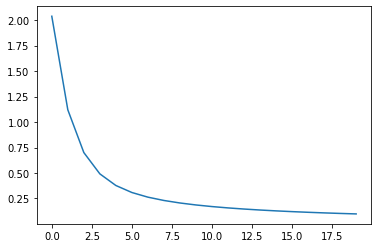

In [ ]:
plt.plot(losses)

# Evaluation/Test

(784,)
Label:  1
Predicited Label 1


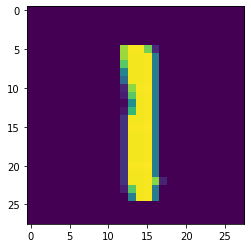

In [ ]:
picked_idx = random.randint(0, x_test.shape[0]-1)

img_picked = x_test[picked_idx]
label = y_test[picked_idx]
print(img_picked.shape)
pred_label = model_predict(W, b, img_picked.reshape(1, -1))
plt.imshow(img_picked.reshape(28, 28))
print('Label: ', label)
print('Predicited Label', 1 if pred_label > 0.5 else 0)

Let us see how well your model did.

In [ ]:
eval_pred = model_predict(W, b, x_test)
eval_pred = (eval_pred > 0.5).astype(float) # anything with more than 50% probability is seen as a 1
accuracy = np.mean((eval_pred == y_test).astype(float))
print('Accuracy: {:.2f}%'.format(float(accuracy*100)))

Accuracy: 98.96%
